In [52]:
import subprocess
import random
import matplotlib.pyplot as plt

## Генератор строк

In [53]:
# set array sizes
array_sizes = list(range(100, 3001, 100))

In [54]:
class StringGenerator:
    def __init__(self):
        self.vocab = "!#%()*-0123456789:;@ABCDEFGHIJKLMNOPQRSTUVWXYZ^abcdefghijklmnopqrstuvwxyz"

    def random_string(self):
        length = random.randint(10, 200)
        return ''.join(random.choice(self.vocab) for _ in range(length))

    def generate_array(self, array_size, mode='unsorted'):
        array = [self.random_string() for _ in range(array_size)]
        
        if mode == 'reverse_sorted':
            return sorted(array, reverse=True)
        elif mode == 'nearly_sorted':
            sorted_array = sorted(array)
            for _ in range(int(len(sorted_array) * 0.05)):  # shuffle 5% of elements
                i, j = random.sample(range(len(sorted_array)), 2)
                sorted_array[i], sorted_array[j] = sorted_array[j], sorted_array[i]
            return sorted_array
        return array

## Компиляция алгоритмов на C++

In [55]:
# compile the C++ algorithm
def compile_cpp(algorithm):
    compile_cmd = ["g++", f"algorithms/{algorithm}.cpp", "-o", algorithm, "-std=c++20"]
    compile_process = subprocess.run(compile_cmd, capture_output=True, text=True)
    if compile_process.returncode != 0:
        print(f"Compilation failed for {algorithm}:", compile_process.stderr)

# run the C++ algorithm
def run_cpp_sorting(data, algorithm):
    with open('input.txt', 'w') as f:
        f.write(' '.join(data))
    
    run_cmd = [f"./{algorithm}"]
    result = subprocess.run(run_cmd, text=True, input=' '.join(data), capture_output=True)
    
    if result.returncode != 0:
        print(f"Error running {algorithm}:", result.stderr)
    else:
        # return everything from std::cout
        return result.stdout

## Оценка перфоманса алгоритмов

In [56]:
# evaluate the algorithms
def measure_sort_performance(array_size, mode, algorithms):
    g = StringGenerator()
    data = g.generate_array(array_size, mode=mode)
    correct_output = " ".join(sorted(data))
    
    runtimes = []
    comparisons = []
    
    print(f"\nRunning experiment for mode: {mode.upper()},\tsize: {array_size}\n-----")
    for algorithm in algorithms:
        compile_cpp(algorithm)
        
        cout = run_cpp_sorting(data, algorithm)
        
        output, stats = cout.split("\n")
        
        # stats (runtime and number of comparisons)
        runtime, comps = stats.split()
        runtime = float(runtime) * 1000
        comps = int(comps)
        print(f"{algorithm} runtime: {runtime:.2f} ms, comparisons: {comps},", end=" ")
        print("correct output" if correct_output == output else "WRONG OUTPUT")
        if correct_output != output:
            print("\n")
            print(correct_output, output, sep="\n")
            print("\n")
        
        runtimes.append(runtime)
        comparisons.append(comps)
     
    return runtimes, comparisons

## Визуализация результатов

In [57]:
# plot runtime vs. array size
def plot_runtime_vs_array_size(runtime_data, array_sizes, algorithms):
    fig, ax = plt.subplots(figsize=(14, 6))
    for i, algorithm in enumerate(algorithms):
        ax.plot(array_sizes, runtime_data[i], label=algorithm, marker='o')
    ax.set_xlabel('Array Size')
    ax.set_ylabel('Runtime (ms)')
    ax.set_title('Runtime vs. Array Size')
    ax.legend()
    ax.grid(True)
    plt.show()

# plot runtime and comparisons
def plot_results(runtimes, comparisons, algorithms):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.bar(algorithms, runtimes, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
    ax1.set_ylabel('Runtime (ms)')
    ax1.set_title('Sorting Algorithm Runtime Comparison')
    ax1.set_xticks(range(len(algorithms)))
    ax1.set_xticklabels(algorithms, rotation=45, ha="right")
    ax1.grid(True)

    ax2.bar(algorithms, comparisons, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
    ax2.set_ylabel('Comparisons')
    ax2.set_title('Sorting Algorithm Comparisons Comparison')
    ax2.set_xticks(range(len(algorithms)))
    ax2.set_xticklabels(algorithms, rotation=45, ha="right")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

## Проводим тестирование

MODE: unsorted

Running experiment for mode: UNSORTED,	size: 100
-----


quicksort runtime: 0.39 ms, comparisons: 392, correct output
mergesort runtime: 0.16 ms, comparisons: 549, correct output
string_quicksort runtime: 0.17 ms, comparisons: 535, correct output
string_mergesort runtime: 0.17 ms, comparisons: 569, correct output
msd_radix_sort runtime: 0.21 ms, comparisons: 172, correct output
msd_radix_sort_switch runtime: 0.19 ms, comparisons: 136, correct output

Running experiment for mode: UNSORTED,	size: 200
-----
quicksort runtime: 0.22 ms, comparisons: 1178, correct output
mergesort runtime: 0.29 ms, comparisons: 1269, correct output
string_quicksort runtime: 0.49 ms, comparisons: 1496, correct output
string_mergesort runtime: 0.30 ms, comparisons: 1309, correct output
msd_radix_sort runtime: 0.46 ms, comparisons: 395, correct output
msd_radix_sort_switch runtime: 0.29 ms, comparisons: 338, correct output

Running experiment for mode: UNSORTED,	size: 300
-----
quicksort runtime: 0.36 ms, comparisons: 1783, correct output
mergesort runtime: 0.46 ms, 

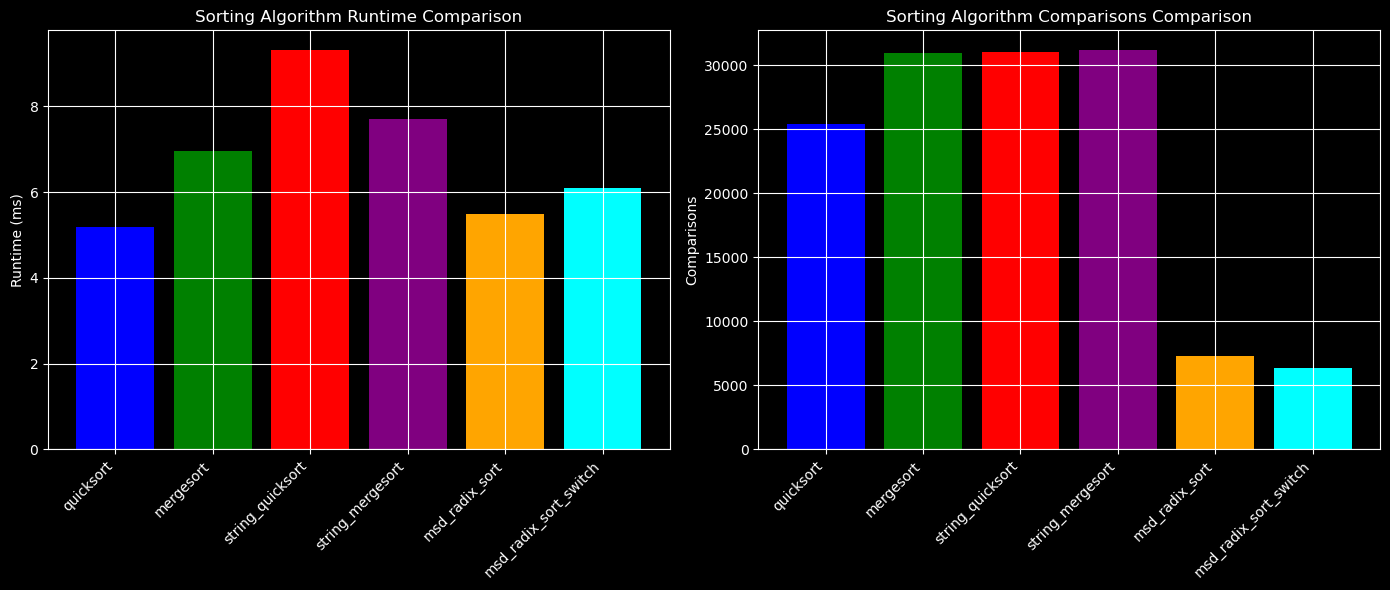

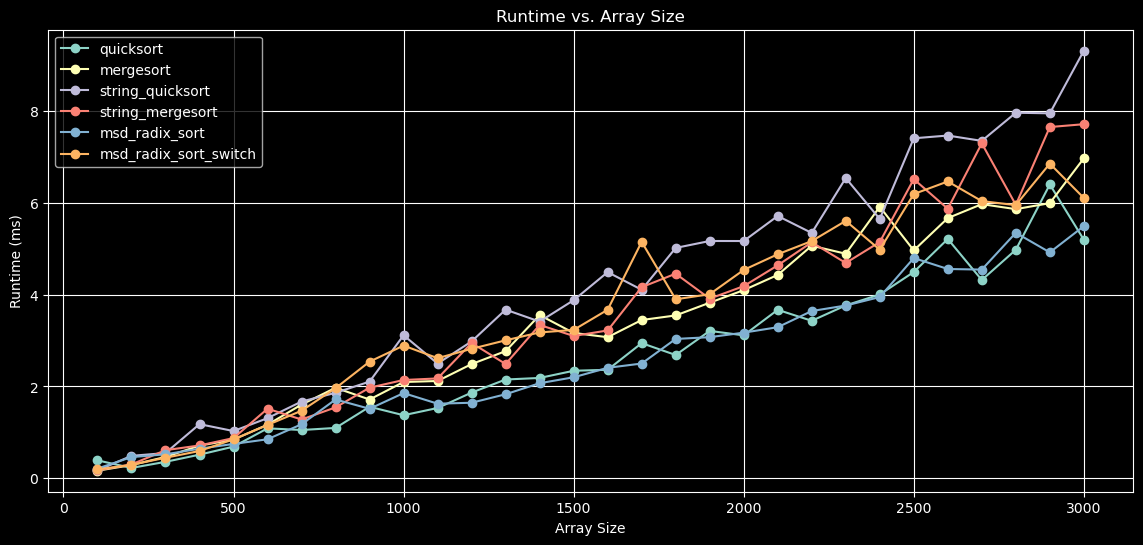

MODE: reverse_sorted

Running experiment for mode: REVERSE_SORTED,	size: 100
-----
quicksort runtime: 0.07 ms, comparisons: 386, correct output
mergesort runtime: 0.12 ms, comparisons: 316, correct output
string_quicksort runtime: 0.14 ms, comparisons: 438, correct output
string_mergesort runtime: 0.12 ms, comparisons: 316, correct output
msd_radix_sort runtime: 0.23 ms, comparisons: 183, correct output
msd_radix_sort_switch runtime: 0.17 ms, comparisons: 102, correct output

Running experiment for mode: REVERSE_SORTED,	size: 200
-----
quicksort runtime: 0.15 ms, comparisons: 960, correct output
mergesort runtime: 0.25 ms, comparisons: 732, correct output
string_quicksort runtime: 0.30 ms, comparisons: 1012, correct output
string_mergesort runtime: 0.25 ms, comparisons: 732, correct output
msd_radix_sort runtime: 0.94 ms, comparisons: 396, correct output
msd_radix_sort_switch runtime: 0.65 ms, comparisons: 254, correct output

Running experiment for mode: REVERSE_SORTED,	size: 300
----

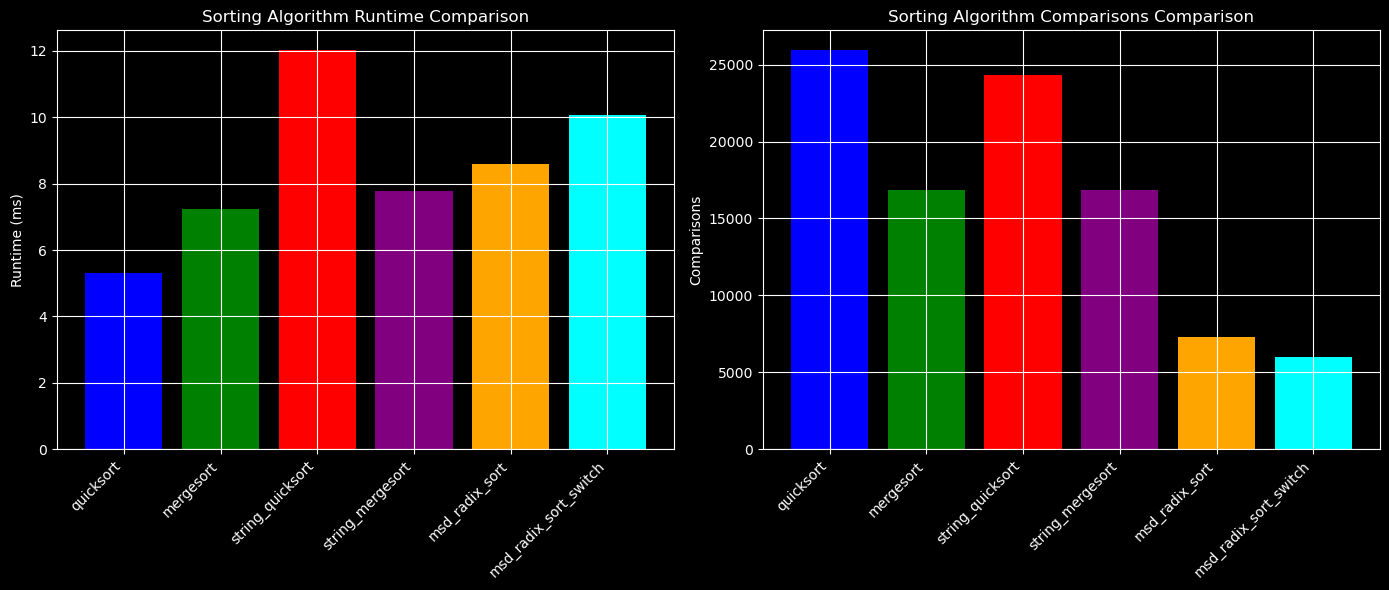

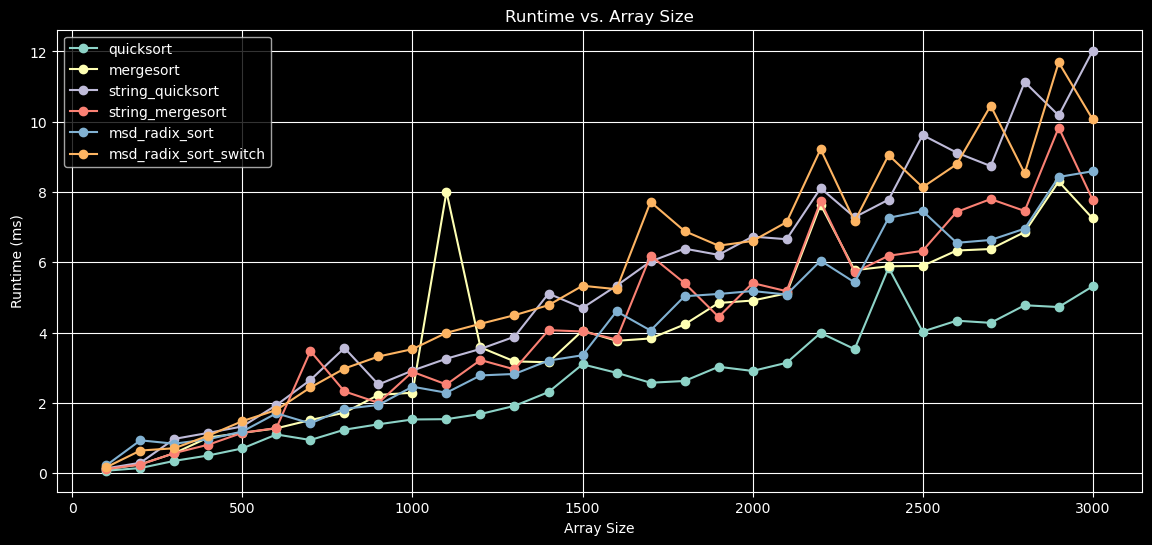

MODE: nearly_sorted

Running experiment for mode: NEARLY_SORTED,	size: 100
-----
quicksort runtime: 0.11 ms, comparisons: 470, correct output
mergesort runtime: 0.15 ms, comparisons: 442, correct output
string_quicksort runtime: 0.21 ms, comparisons: 454, correct output
string_mergesort runtime: 0.15 ms, comparisons: 450, correct output
msd_radix_sort runtime: 0.38 ms, comparisons: 184, correct output
msd_radix_sort_switch runtime: 0.31 ms, comparisons: 154, correct output

Running experiment for mode: NEARLY_SORTED,	size: 200
-----
quicksort runtime: 0.24 ms, comparisons: 1179, correct output
mergesort runtime: 0.36 ms, comparisons: 1113, correct output
string_quicksort runtime: 0.47 ms, comparisons: 1042, correct output
string_mergesort runtime: 0.36 ms, comparisons: 1114, correct output
msd_radix_sort runtime: 0.84 ms, comparisons: 391, correct output
msd_radix_sort_switch runtime: 0.44 ms, comparisons: 363, correct output

Running experiment for mode: NEARLY_SORTED,	size: 300
-----

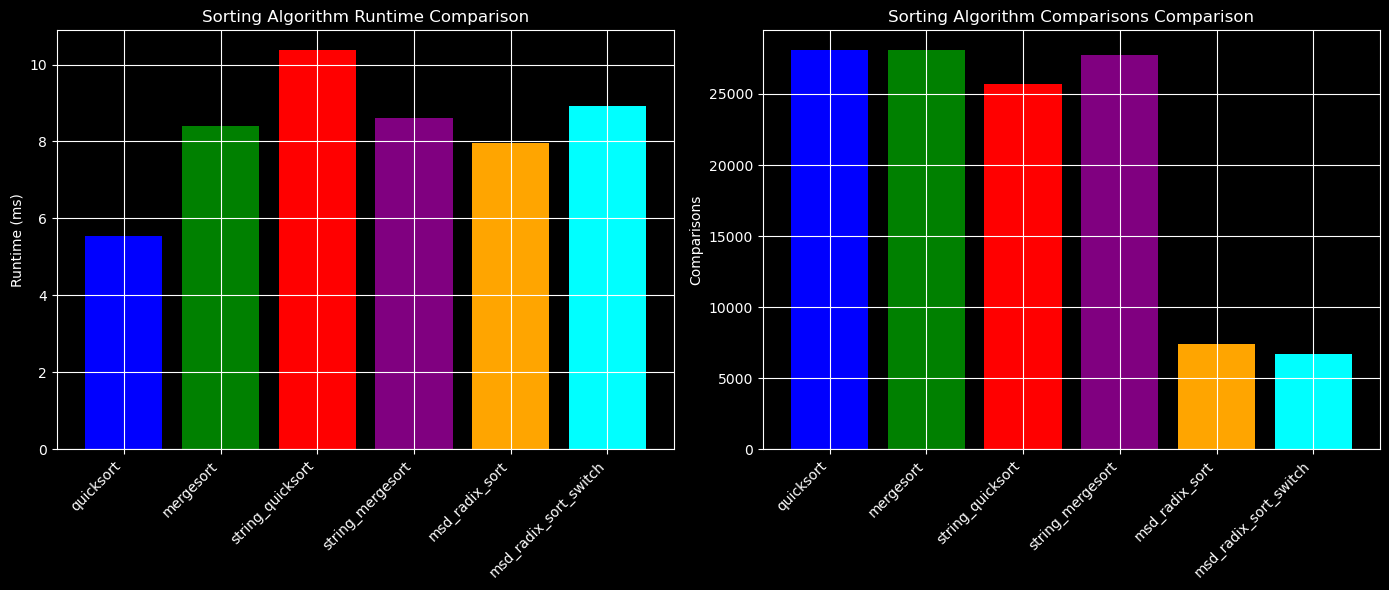

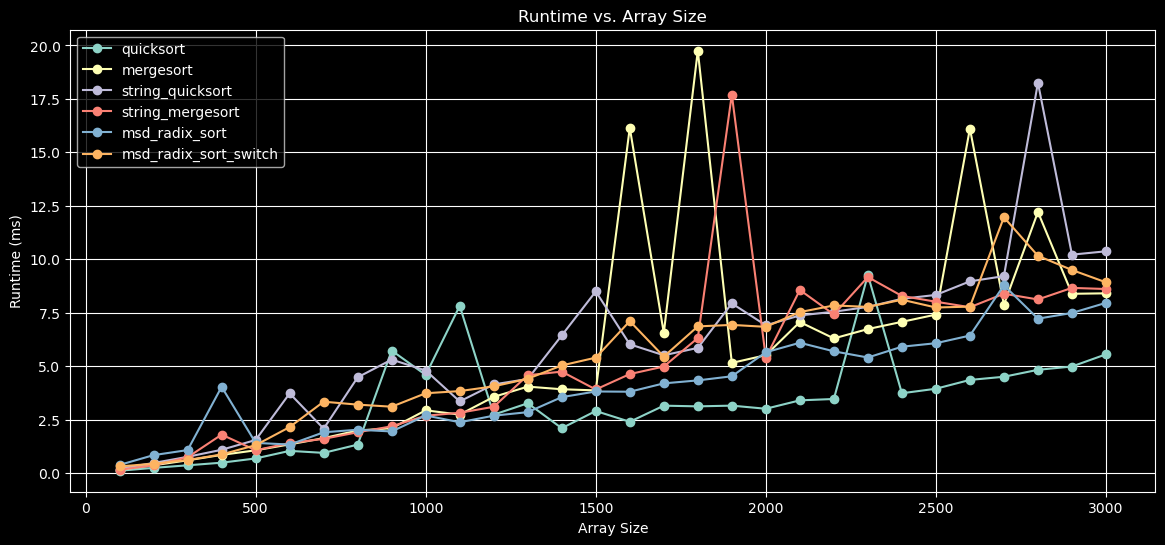

In [58]:
# main script
algorithms = ['quicksort', 'mergesort', 'string_quicksort', 'string_mergesort', 'msd_radix_sort', 'msd_radix_sort_switch']
modes = ['unsorted', 'reverse_sorted', 'nearly_sorted']

for mode in modes:
    print(f"MODE: {mode}")
    runtime_data = [[] for _ in algorithms]  # reset runtime data for each mode
    comparison_data = [[] for _ in algorithms]  # reset comparison data for each mode
    for size in array_sizes:
        runtimes, comparisons = measure_sort_performance(size, mode, algorithms)
        for i, (runtime, comparison) in enumerate(zip(runtimes, comparisons)):
            runtime_data[i].append(runtime)
            comparison_data[i].append(comparison)
    plot_results(runtimes, comparisons, algorithms)
    plot_runtime_vs_array_size(runtime_data, array_sizes, algorithms)


## Эмпирический анализ работы алгоритмов сортировки

Производительность нескольких алгоритмов сортировки была оценена в трех различных условиях: несортированные данные, данные в обратном порядке и почти отсортированные данные. Были протестированы следующие алгоритмы:

- **Быстрая сортировка (Quicksort)**
- **Сортировка слиянием (Mergesort)**
- **Строковая быстрая сортировка (String Quicksort)**
- **Строковая сортировка слиянием (String Mergesort)**
- **Поразрядная сортировка MSD (MSD Radix Sort)**
- **Поразрядная сортировка MSD с переключением на быструю сортировку (MSD Radix Sort with Switch)**

### 1. Несортированные данные

#### Сравнение времени выполнения
- **Quicksort**: Самый быстрый вместе с MSD Radix. 
- **Mergesort**: Немного медленнее, чем Quicksort.
- **String Quicksort**: Один из самых медленных алгоритмов, показывает наибольшее время выполнения.
- **String Mergesort**: Похожа на String Quicksort, но немного лучше.
- **MSD Radix Sort**: Самый быстрый вместе с Quicksort.
- **MSD Radix Sort with Switch**: Также очень эффективен, немного медленнее, чем MSD Radix Sort, но все равно среди самых быстрых.

#### Сравнения
- **MSD Radix Sort** и **MSD Radix Sort with Switch**: Требуют значительно меньше сравнений по сравнению с другими алгоритмами.
- **Quicksort**, **Mergesort**, **String Quicksort** и **String Mergesort**: Показывают большее количество сравнений.

### 2. Данные в обратном порядке

#### Сравнение времени выполнения
- **Quicksort**: Продолжает быть самым быстрым.
- **Mergesort**: Поддерживает стабильную производительность, немного медленнее, чем Quicksort.
- **String Quicksort**: Снова один из самых медленных алгоритмов.
- **String Mergesort**: Немного лучше, чем String Quicksort.
- **MSD Radix Sort**: Теперь немного отстаёт от Quicksort, но все еще работает хорошо.
- **MSD Radix Sort with Switch**: Демонстрирует эффективность, время выполнения близко к MSD Radix Sort.

#### Сравнения
- **MSD Radix Sort** и **MSD Radix Sort with Switch**: Поддерживают низкое количество сравнений.
- **Алгоритмы на основе сравнений**: Quicksort, Mergesort, String Quicksort и String Mergesort показывают большее количество сравнений, аналогично несортированному случаю.

### 3. Почти отсортированные данные

#### Сравнение времени выполнения
- **Quicksort**: Работает очень хорошо, показывая быстрое время выполнения.
- **Mergesort**: Стабильная производительность, медленнее, чем Quicksort, но лучше, чем в других условиях.
- **String Quicksort**: Один из самых медленных алгоритмов.
- **String Mergesort**: Немного лучше, чем String Quicksort.
- **MSD Radix Sort**: Поддерживает самую быструю производительность.
- **MSD Radix Sort with Switch**: Очень эффективен, близок к MSD Radix Sort.

#### Сравнения
- **MSD Radix Sort** и **MSD Radix Sort with Switch**: Требуют меньше сравнений.
- **Алгоритмы на основе сравнений**: Показывают большее количество сравнений, аналогично предыдущим условиям.

### Итог

#### Анализ времени выполнения
- **MSD Radix Sort** показывает лучшую производительность по времени выполнения во всех условиях.
- **MSD Radix Sort with Switch** также очень эффективен, немного уступая MSD Radix Sort.
- **Quicksort** хорошо работает, особенно на почти отсортированных данных.
- **Mergesort** показывает стабильную производительность, но в целом медленнее, чем Quicksort.
- **String Quicksort** и **String Mergesort** самые медленные среди протестированных алгоритмов.

#### Анализ сравнений
- **MSD Radix Sort** и **MSD Radix Sort with Switch** показывают значительно меньшее количество сравнений, что делает их высокоэффективными.
- **Алгоритмы на основе сравнений** (Quicksort, Mergesort, String Quicksort, String Mergesort) показывают большее количество сравнений, что ожидаемо из-за их алгоритмической природы.